# **Actividad 5: Uso de software para búsqueda.**
# Jorge Axel Espronceda Rodríguez
# 1965626
# Hora: N1

In [33]:
#Se importan las librerias
import tensorflow as tf #Libreria de tensor flow y keras
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [19]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [20]:
train_data = train_data / 255.0
test_data = test_data / 255.0

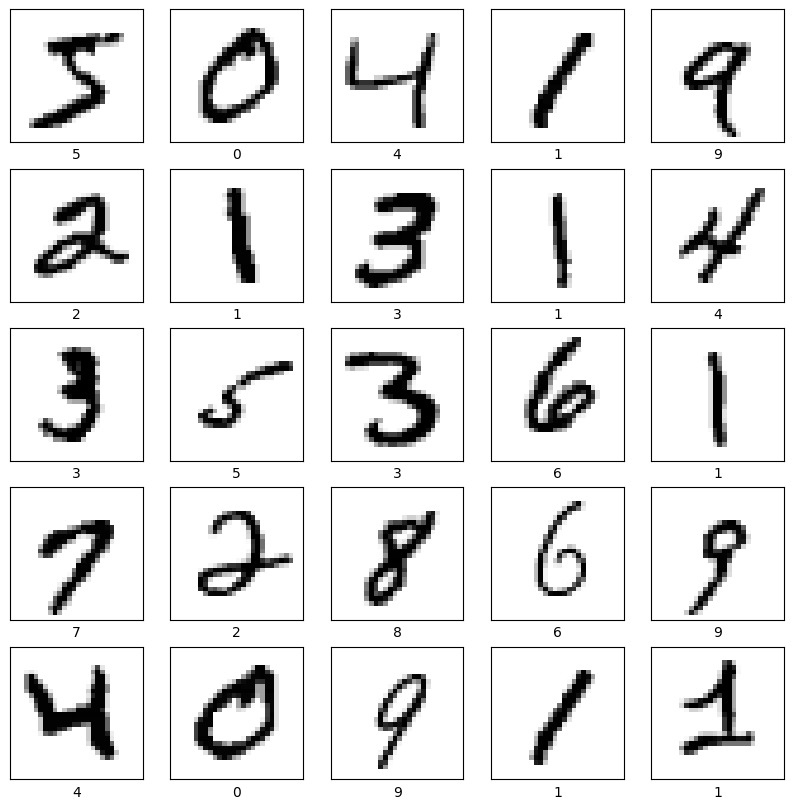

In [34]:
#Se muestran las figuras
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),#Blanco y negro, se aplasta a una sola capa con 784 neuronas donde ahi se alamacenas las neuronas
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4550 - accuracy: 0.8634
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3572 - accuracy: 0.9142
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2578 - accuracy: 0.9355
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2326 - accuracy: 0.9410
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2180 - accuracy: 0.9452
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1940 - accuracy: 0.9518
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1920 - accuracy: 0.9528
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1838 - accuracy: 0.9554
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1790 - accuracy: 0.9563
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.176

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2432 - accuracy: 0.9474 - 602ms/epoch - 2ms/step

Test accuracy: 0.9473999738693237


In [26]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]
np.argmax(predictions[0])
test_labels[0]

313/313 [==============================] - 1s 2ms/step


7

In [27]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

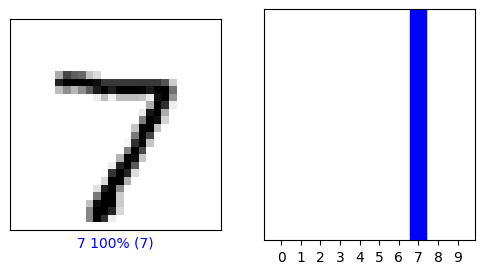

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

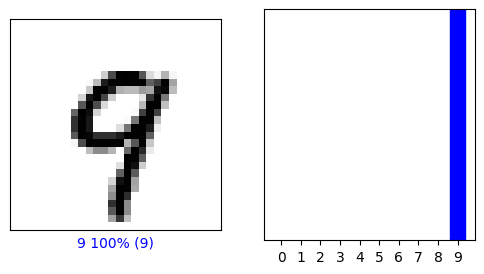

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

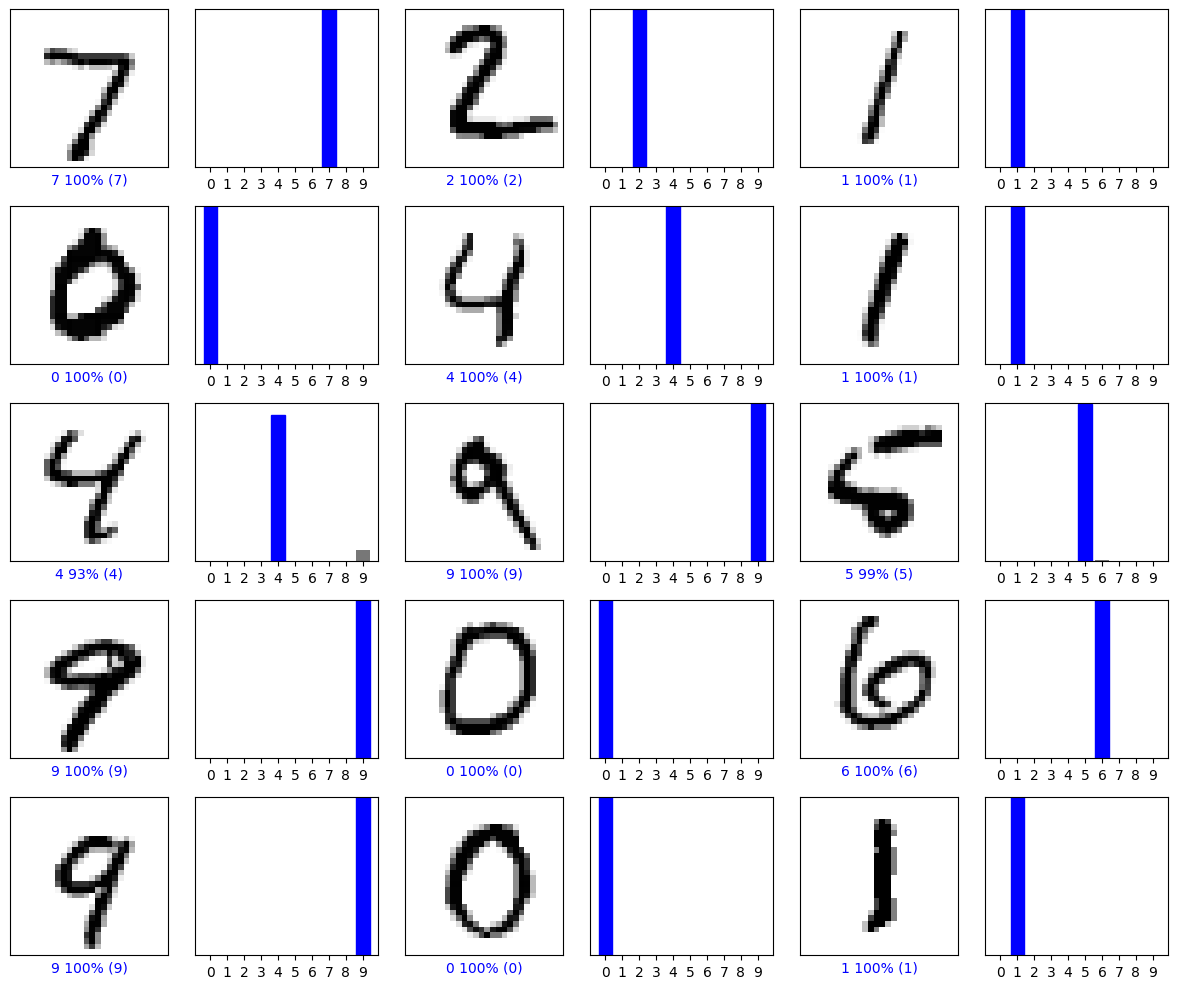

In [32]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# **Conclusion**
# Podemos Concluir que entrenamos bien la IA, con una precision del 92%.